In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#for testing
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
a = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\income.csv', index_col = 0)

In [6]:
df = a.copy()

In [7]:
df.head(20)

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
age,,,,,,,,,,,,
45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"


In [8]:
#checking all datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 45 to 29
Data columns (total 12 columns):
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [9]:
#checking missing values
df.isnull().sum()

JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [14]:
#let's get our summary stats:

summary_numerical  = df.describe()

summary_categorical = df.describe(include = 'O')

In [15]:
print(summary_numerical)

        capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000
mean    1064.360623     86.739352     40.417850
std     7298.596271    401.594301     12.345285
min        0.000000      0.000000      1.000000
25%        0.000000      0.000000     40.000000
50%        0.000000      0.000000     40.000000
75%        0.000000      0.000000     45.000000
max    99999.000000   4356.000000     99.000000


In [16]:
print(summary_categorical)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [17]:
#we need a good representation of the classes
#frequency of each category

df['JobType'].value_counts()


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [20]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
#as we have seen that there exists a few special characters

print(np.unique(df['JobType']))
print(np.unique(df['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [23]:
#what we can oserve is that from the following results we see, there exists a space before every sector
#hence it is showing here

#also the ' ?' value is not being read as a missing value
#we have to re-read the data file to include na_values to consider as nan

df = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\income.csv', index_col = 0, na_values = [' ?'])



In [24]:
df.isnull().sum()

JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [25]:
# now we get a correct interpretation of the dataset
# we shall start Data pre-processing

In [28]:
df[['JobType','occupation']].head(20)

,JobType,occupation
age,,
45,Private,Adm-clerical
24,Federal-gov,Armed-Forces
44,Private,Prof-specialty
27,Private,Craft-repair
20,Private,Sales
44,Private,Exec-managerial
51,Private,Craft-repair
20,Private,Machine-op-inspct
17,NaN,NaN


In [29]:
#keypoint to note here is that, while subsetting multiple column names to the subsetting operator []
# it is important to pass it on to the header ass a list



In [30]:
#now we write a command to get the number of missing values such that it returns
#even if a single value of a column is missing in the row

missing = df[df.isnull().any(axis = 1)]

In [32]:
print(missing.shape)
print(missing.head())


(1816, 12)
    JobType         EdType        maritalstatus occupation     relationship  \
age                                                                           
17      NaN           11th        Never-married        NaN        Own-child   
32      NaN   Some-college   Married-civ-spouse        NaN          Husband   
22      NaN   Some-college        Never-married        NaN        Own-child   
52      NaN           12th        Never-married        NaN   Other-relative   
63      NaN        1st-4th   Married-civ-spouse        NaN          Husband   

       race   gender  capitalgain  capitalloss  hoursperweek   nativecountry  \
age                                                                            
17    White   Female            0            0             5   United-States   
32    White     Male            0            0            40   United-States   
22    White     Male            0            0            40   United-States   
52    Black     Male          594  

In [36]:
df[['JobType', 'occupation']].head(30)

,JobType,occupation
age,,
45,Private,Adm-clerical
24,Federal-gov,Armed-Forces
44,Private,Prof-specialty
27,Private,Craft-repair
20,Private,Sales
44,Private,Exec-managerial
51,Private,Craft-repair
20,Private,Machine-op-inspct
17,NaN,NaN


In [37]:
# it is observed that missing values in JobType and ccupation having a dataframe size of 
# 1806 and 1813 have a difference of 7. This signifies that we don't know why there are set as 
# missing values nor do we know the relationship between them

#hence we drop them

df2 = df.dropna( axis = 0)

In [38]:
#axis = 0 drops out all the rows with missing values

In [39]:
#defining correlation

df2.corr()

,capitalgain,capitalloss,hoursperweek
capitalgain,1.000000,-0.032229,0.080432
capitalloss,-0.032229,1.000000,0.052417
hoursperweek,0.080432,0.052417,1.000000


In [40]:
#we observe that none of the independent variables have a strong correlation or let's say they 
#very weak or rather no correlation with each other because none of the corr values come closer
# to 1. They are very very lesser than 1.

In [44]:
#crosstab and visualization
gender = pd.crosstab( index = df2['gender'],
                       columns = 'count', normalize = True
                        )

In [45]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [50]:
#seeing how gender vs Salary status vary

gender_salstat = pd.crosstab( index = df2['gender'],
                              columns = df2['SalStat'],
                              margins = True,
                              normalize = 'index'  )

In [51]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


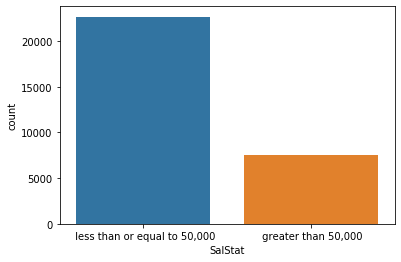

In [52]:
#getting frequency of salary status

SalStat = sns.countplot(df2['SalStat'])

In [63]:
a = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\income.csv')

In [64]:
a.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [65]:
a.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             44
 less than or equal to 50,000    34
Name: age, dtype: int64

In [68]:
# we now build the logistic regression model

df2.columns

Index(['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek',
       'nativecountry', 'SalStat'],
      dtype='object')

In [69]:
#reindexing categorical variables to 0,1

df2['SalStat'] = df2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
print(df2['SalStat'])

age
45    0
24    0
44    1
27    0
20    0
     ..
34    0
34    0
23    0
42    0
29    0
Name: SalStat, Length: 30162, dtype: int64


In [71]:
#now we will use the get dummies function which will split the categorical data into its components
#and establish it's own dataframe. 

new_data = pd.get_dummies(df2, drop_first = True)

In [72]:
#storing columns list

columns_list = list(new_data.columns)

In [73]:
print(columns_list)

['capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', '

In [74]:
#since our  classification algorithm will be clasifying based on salar status, it becomes our input variable.
#hence we need to seperate input variables from data

features = list(set(columns_list) - set(['SalStat']))
print(features)

['nativecountry_ Italy', 'JobType_ Local-gov', 'EdType_ Prof-school', 'nativecountry_ Portugal', 'EdType_ 1st-4th', 'maritalstatus_ Never-married', 'nativecountry_ Thailand', 'nativecountry_ Ireland', 'occupation_ Machine-op-inspct', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Guatemala', 'occupation_ Craft-repair', 'nativecountry_ Canada', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'relationship_ Wife', 'hoursperweek', 'EdType_ Assoc-acdm', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Unmarried', 'nativecountry_ China', 'nativecountry_ Scotland', 'maritalstatus_ Widowed', 'occupation_ Tech-support', 'nativecountry_ Mexico', 'EdType_ Preschool', 'occupation_ Other-service', 'maritalstatus_ Married-AF-spouse', 'EdType_ 7th-8th', 'nativecountry_ Nicaragua', 'capitalgain', 'occupation_ Prof-specialty', 'nativecountry_ India', 'nativecountry_ United-States', 'EdType_ 5th-6th', 'nativecountry_ Puerto-Rico', 'nativecountry_ Honduras', 'nativecountr

In [75]:
#now we need to store the values from the dataframe

y = new_data['SalStat'].values

In [76]:
print(y)

[0 0 1 ... 0 0 0]


In [77]:
#so we have successfully stored the values of SalStat in the encoded version in y

In [78]:
#storing the values from the input features

x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [79]:
#KEY POINT TO UNDERSTAND IS THAT INHERENTLY FEATURES BECOMES A PART OF NEW DATA DF.

In [80]:
#splitting data

In [86]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [88]:
#making an instance of a model

logistic = LogisticRegression()

In [89]:
#fitting the values of x and y

logistic.fit(train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
print(f'Coefficients are {logistic.coef_}')
print(f'Intercept term is {logistic.intercept_}')


Coefficients are [[ 4.65614630e-02 -6.83847534e-01  1.04677198e+00 -7.77046920e-02
  -3.18312613e-01 -9.45111761e-01 -2.12391980e-02 -1.08503005e-02
  -5.55950176e-01 -2.62046659e-03 -9.12220958e-02 -9.77924867e-02
   5.56475130e-02 -4.79651562e-02  7.89333176e-01  2.25205815e-02
  -1.61581987e-01 -5.02278142e-01 -7.72907168e-01 -8.89176513e-01
  -1.69249700e-01 -2.88855766e-02 -2.22359824e-02  6.91535265e-01
  -8.39573962e-01 -1.42574186e-01 -1.11506329e+00  1.32888913e-01
  -1.04020486e+00 -5.68817055e-02  3.16083175e-04  5.90647792e-01
  -1.95905259e-01  1.07504443e-01 -5.72201227e-01 -2.09391826e-01
  -1.00263746e-02 -4.51882606e-02  1.16338763e+00 -8.49271124e-01
   1.50911460e-03 -3.89743181e-01 -5.20661361e-03 -1.63719427e-01
  -6.53600283e-01  3.98571251e-04 -8.87571090e-02 -1.20042435e-01
  -2.14213528e-02  9.47374221e-01 -1.59105110e+00 -4.27400481e-02
   3.18094242e-02  3.52093217e-01 -1.51203288e-01 -3.30398542e-01
   6.48557436e-04 -4.21323636e-02 -7.24250853e-01  7.468591

In [91]:
#predicting using the model

prediction = logistic.predict(test_x)

In [95]:
print(np.array(prediction))

[0 0 0 ... 0 0 0]


In [96]:
#preparing a confusion matrix to evaluate the classifier's performance

confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6325  498]
 [ 939 1287]]


In [97]:
#as we have to calculate the accuracy of the classifier

accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8411979224223671


In [101]:
#we have to see the misclassified values

print('misclassified samples: %d' % (test_y != prediction).sum())


misclassified samples: 1437


In [99]:
misclass.shape

(9049,)

In [102]:
#nw with so many misclassifications, we can improve the accuracy of the model
#by removing the insignificant variables

df2['SalStat'] = df2['SalStat'].map({' less than or equal to 50,000':0, ' greather than 50,000':1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [104]:
df2['SalStat'].head(10)

age
45   NaN
24   NaN
44   NaN
27   NaN
20   NaN
44   NaN
51   NaN
20   NaN
19   NaN
45   NaN
Name: SalStat, dtype: float64

In [105]:
df2.head()

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
age,,,,,,,,,,,,
45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,NaN
24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,NaN
44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN
27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,NaN
20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,NaN


In [106]:
#removing insignificant datatypes

cols = ['JobType','race','gender','nativecountry']

new_data = df2.drop(cols, axis =1)